## Работа с датасетом по фильмам Disney

In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
data_raw = pd.read_csv('DisneyMoviesDataset.csv')
data_raw.head(5)

,Unnamed: 0,title,Production company,Release date,Running time,Country,Language,Running time (int),Budget (float),Box office (float),...,Box office,Story by,Narrated by,Cinematography,Edited by,Screenplay by,Production companies,Adaptation by,Traditional,Simplified
0,0,Academy Award Review of,Walt Disney Productions,"['May 19, 1937']",41 minutes (74 minutes 1966 release),United States,English,41.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Snow White and the Seven Dwarfs,Walt Disney Productions,"['December 21, 1937 ( Carthay Circle Theatre ,...",83 minutes,United States,English,83.0,1490000.0,418000000.0,...,$418 million,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,Pinocchio,Walt Disney Productions,"['February 7, 1940 ( Center Theatre )', 'Febru...",88 minutes,United States,English,88.0,2600000.0,164000000.0,...,$164 million,"['Ted Sears', 'Otto Englander', 'Webb Smith', ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,Fantasia,Walt Disney Productions,"['November 13, 1940']",126 minutes,United States,English,126.0,2280000.0,83300000.0,...,$76.4–$83.3 million,"['Joe Grant', 'Dick Huemer']",Deems Taylor,James Wong Howe,NaN,NaN,NaN,NaN,NaN,NaN
4,4,The Reluctant Dragon,Walt Disney Productions,"['June 20, 1941']",74 minutes,United States,English,74.0,600000.0,960000.0,...,"$960,000 (worldwide rentals)",NaN,NaN,Bert Giennon,Paul Weatherwax,NaN,NaN,NaN,NaN,NaN


In [83]:
data_raw.iloc[:5, :5].T #по заданию нужно сделать срез и транспонировать его

,0,1,2,3,4
Unnamed: 0,0,1,2,3,4
title,Academy Award Review of,Snow White and the Seven Dwarfs,Pinocchio,Fantasia,The Reluctant Dragon
Production company,Walt Disney Productions,Walt Disney Productions,Walt Disney Productions,Walt Disney Productions,Walt Disney Productions
Release date,"['May 19, 1937']","['December 21, 1937 ( Carthay Circle Theatre ,...","['February 7, 1940 ( Center Theatre )', 'Febru...","['November 13, 1940']","['June 20, 1941']"
Running time,41 minutes (74 minutes 1966 release),83 minutes,88 minutes,126 minutes,74 minutes


In [84]:
data_raw.groupby('Country').imdb.mean()

Country
Australia                                                          NaN
France                                                        7.650000
Germany                                                       4.800000
India                                                         6.680000
Russia                                                             NaN
United States                                                 6.549171
United States, Mexico                                         6.100000
['Australia', 'United Kingdom', 'United States']              7.500000
['Canada', 'Malaysia', 'United States']                       6.000000
['France', 'United Kingdom', 'Germany', 'United States']      8.000000
['France', 'United States']                                   7.400000
['Germany', 'Austria', 'Italy', 'Spain', 'United Kingdom']    5.200000
['Norway', 'Sweden', 'United States']                         6.700000
['Spain', 'Italy']                                                 Na

Видим много столбцов, для которых часто нет данных и которые не несут важной информации. Также есть столбцы, которые дублирую друг друга. Оставим только нужные нам столбцы.

title - название фильма (String)

Country - страна производства (String, 4 missing)

Running time - длительность (Int, 10 missing)

Budget - бюджет (Float, USD, 159 missing)

Box office - сборы в кино (Float, USD, 77 missing)

Release date - дата выхода (datatime, 4 missing)

imdb - рейтинг imdb (Float, 10 missing)

In [85]:
data = pd.DataFrame([])
for i in ['title', 'Country', 'Language', 'Running time (int)',
       'Budget (float)', 'Box office (float)', 'Release date (datetime)',
       'imdb']:
    data[i] = data_raw[i]
data.columns = ['title', 'Country', 'Language', 'Running time',
       'Budget', 'Box office', 'Release date',
       'imdb']
data.head(100)

,title,Country,Language,Running time,Budget,Box office,Release date,imdb
0,Academy Award Review of,United States,English,41.0,NaN,NaN,1937-05-19,7.2
1,Snow White and the Seven Dwarfs,United States,English,83.0,1490000.0,418000000.0,1937-12-21,7.6
2,Pinocchio,United States,English,88.0,2600000.0,164000000.0,1940-02-07,7.4
3,Fantasia,United States,English,126.0,2280000.0,83300000.0,1940-11-13,7.8
4,The Reluctant Dragon,United States,English,74.0,600000.0,960000.0,1941-06-20,6.9
...,...,...,...,...,...,...,...,...
95,King of the Grizzlies,"['United States', 'Canada']",English,93.0,NaN,NaN,1970-02-11,5.7
96,The Boatniks,United States,English,100.0,NaN,18607492.0,1970-07-01,5.5
97,The Wild Country,United States,English,100.0,NaN,4000000.0,1970-12-15,6.4
98,The Aristocats,United States,English,79.0,4000000.0,191000000.0,1970-12-11,7.1


In [86]:
data = data.sort_values(by=['Running time', 'Budget']) #есть задание отсортировать по колонкам
data.head(20)

,title,Country,Language,Running time,Budget,Box office,Release date,imdb
289,Roving Mars,United States,English,40.0,1000000.0,11000000.0,2006-01-27,7.2
272,Sacred Planet,"['Canada', 'Malaysia', 'United States']",English,40.0,NaN,1108356.0,2004-04-22,6.0
0,Academy Award Review of,United States,English,41.0,NaN,NaN,1937-05-19,7.2
7,Saludos Amigos,United States,"['English', 'Portuguese', 'Spanish']",42.0,NaN,1135000.0,1942-08-24,6.1
130,A Tale of Two Critters,United States,English,48.0,NaN,NaN,1977-06-22,7.1
267,The Young Black Stallion,United States,English,50.0,NaN,9638389.0,2003-12-25,5.6
24,The Vanishing Prairie,United States,English,60.0,NaN,1750000.0,1954-08-17,7.7
259,Ghosts of the Abyss,United States,English,61.0,13000000.0,28700000.0,2003-03-31,6.8
5,Dumbo,United States,English,64.0,950000.0,1300000.0,1941-10-23,7.2
8,Victory Through Air Power,United States,English,65.0,788000.0,799000.0,1943-07-17,6.5


Отредактируем столбец "Соuntry" и сделаем две категории - United States и Other

In [87]:
for i, t in enumerate(data['Country']):
    if t != 'United States' and str(t) != '\[\'United States\'\]': 
        data['Country'].iloc[i] = 'Other'
    else:
        data['Country'].iloc[i] = 'United States'
data.head(20)

C:\Users\petrk\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


,title,Country,Language,Running time,Budget,Box office,Release date,imdb
289,Roving Mars,United States,English,40.0,1000000.0,11000000.0,2006-01-27,7.2
272,Sacred Planet,Other,English,40.0,NaN,1108356.0,2004-04-22,6.0
0,Academy Award Review of,United States,English,41.0,NaN,NaN,1937-05-19,7.2
7,Saludos Amigos,United States,"['English', 'Portuguese', 'Spanish']",42.0,NaN,1135000.0,1942-08-24,6.1
130,A Tale of Two Critters,United States,English,48.0,NaN,NaN,1977-06-22,7.1
267,The Young Black Stallion,United States,English,50.0,NaN,9638389.0,2003-12-25,5.6
24,The Vanishing Prairie,United States,English,60.0,NaN,1750000.0,1954-08-17,7.7
259,Ghosts of the Abyss,United States,English,61.0,13000000.0,28700000.0,2003-03-31,6.8
5,Dumbo,United States,English,64.0,950000.0,1300000.0,1941-10-23,7.2
8,Victory Through Air Power,United States,English,65.0,788000.0,799000.0,1943-07-17,6.5


Добавим новый столбец — окупаемость(отношение сборов к бюджету)

In [88]:
arr = []
for i, budget in enumerate(data['Budget']):
    box = data['Box office'].iloc[i]
    if budget != budget or box != box or budget == 0 or box/budget > 500000:
        arr.append(np.nan)
    else:
        arr.append(box/budget)
data['Payback'] = arr
data

,title,Country,Language,Running time,Budget,Box office,Release date,imdb,Payback
289,Roving Mars,United States,English,40.0,1000000.0,11000000.0,2006-01-27,7.2,11.0
272,Sacred Planet,Other,English,40.0,NaN,1108356.0,2004-04-22,6.0,NaN
0,Academy Award Review of,United States,English,41.0,NaN,NaN,1937-05-19,7.2,NaN
7,Saludos Amigos,United States,"['English', 'Portuguese', 'Spanish']",42.0,NaN,1135000.0,1942-08-24,6.1,NaN
130,A Tale of Two Critters,United States,English,48.0,NaN,NaN,1977-06-22,7.1,NaN
...,...,...,...,...,...,...,...,...,...
426,Clouds,United States,English,NaN,NaN,NaN,2020-10-16,6.6,NaN
428,Raya and the Last Dragon,United States,English,NaN,NaN,NaN,2021-03-12,NaN,NaN
429,Cruella,United States,English,NaN,NaN,NaN,2021-05-28,NaN,NaN
430,Jungle Cruise,United States,English,NaN,NaN,NaN,2021-07-30,NaN,NaN


Создадим категориальный столбец - поделим фильмы на десятилетия по году выхода

In [89]:
arr = []
for i, date in enumerate(data['Release date']):
    if date != date:
        arr.append('Unknown')
    else:
        arr.append(str(date)[:2] + '00\'s')
data['Century'] = arr
data

,title,Country,Language,Running time,Budget,Box office,Release date,imdb,Payback,Century
289,Roving Mars,United States,English,40.0,1000000.0,11000000.0,2006-01-27,7.2,11.0,2000's
272,Sacred Planet,Other,English,40.0,NaN,1108356.0,2004-04-22,6.0,NaN,2000's
0,Academy Award Review of,United States,English,41.0,NaN,NaN,1937-05-19,7.2,NaN,1900's
7,Saludos Amigos,United States,"['English', 'Portuguese', 'Spanish']",42.0,NaN,1135000.0,1942-08-24,6.1,NaN,1900's
130,A Tale of Two Critters,United States,English,48.0,NaN,NaN,1977-06-22,7.1,NaN,1900's
...,...,...,...,...,...,...,...,...,...,...
426,Clouds,United States,English,NaN,NaN,NaN,2020-10-16,6.6,NaN,2000's
428,Raya and the Last Dragon,United States,English,NaN,NaN,NaN,2021-03-12,NaN,NaN,2000's
429,Cruella,United States,English,NaN,NaN,NaN,2021-05-28,NaN,NaN,2000's
430,Jungle Cruise,United States,English,NaN,NaN,NaN,2021-07-30,NaN,NaN,2000's


In [90]:
%matplotlib inline

Text(0.5, 0.98, 'Зависимость рейтинга от бюджета')

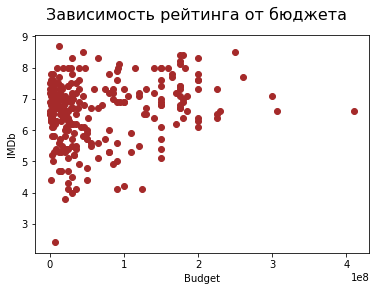

In [91]:
plt.scatter(data['Budget'], data['imdb'], color='brown')
plt.xlabel('Budget')
plt.ylabel('IMDb')
plt.suptitle('Зависимость рейтинга от бюджета', fontsize=16)
#чем выше бюджет, тем ниже минимальный рейтинг

Text(0.5, 0.98, 'Зависимость окупаемости от рейтинга')

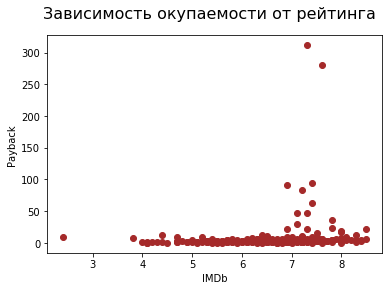

In [92]:
plt.scatter(data['imdb'], data['Payback'], color='brown')
plt.xlabel('IMDb')
plt.ylabel('Payback')
plt.suptitle('Зависимость окупаемости от рейтинга', fontsize=16)
#не видим корелляции

Text(0.5, 0.98, 'Средний рейтинг в 20 и 21 веке')

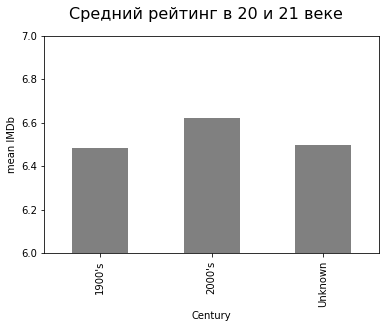

In [93]:
data.groupby('Century').imdb.mean().plot(kind='bar', ylim=[6, 7], color='gray')
plt.ylabel('mean IMDb')
plt.suptitle('Средний рейтинг в 20 и 21 веке', fontsize=16)
#в 21 веке рейтинг выше

Text(0.5, 0.98, 'Бюджет от длительности')

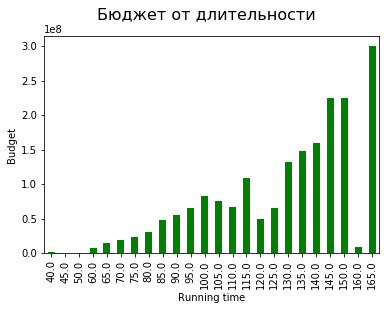

In [94]:
data['Rounded time'] = [(i//5)*5 for i in data['Running time']]
data.groupby('Rounded time').Budget.mean().plot(kind='bar', color='green')
plt.xlabel('Running time')
plt.ylabel('Budget')
data.groupby('Rounded time').imdb.mean()
plt.suptitle('Бюджет от длительности', fontsize=16)
#зависимость похожа на линейную

Text(0.5, 0.98, 'Распределение рейтингов')

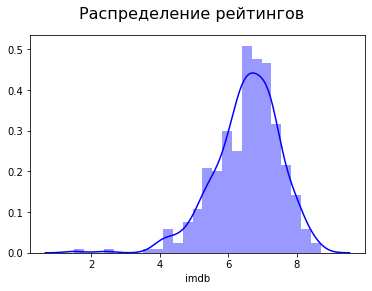

In [95]:
import seaborn as sns
#data.imdb.plot(kind='hist', bins=25)
sns.distplot(data.imdb.dropna(), bins=25, color='blue')
plt.suptitle('Распределение рейтингов', fontsize=16)
#видим нормальное распределение

In [97]:
data.groupby('Country').imdb.mean()

Country
Other            6.520370
United States    6.549171
Name: imdb, dtype: float64

In [98]:
data.groupby('Country')['Budget'].mean()

Country
Other            3.646212e+07
United States    6.731850e+07
Name: Budget, dtype: float64

In [48]:
data.corr()
#максимальная корелляция у длительности и бюджета, что соответствует визуализациям

,Running time,Budget,Box office,imdb,Payback,Rounded time
Running time,1.000000,0.389359,0.278317,0.132544,0.236606,0.997108
Budget,0.389359,1.000000,0.740025,0.200979,-0.239133,0.391800
Box office,0.278317,0.740025,1.000000,0.381170,-0.191763,0.276634
imdb,0.132544,0.200979,0.381170,1.000000,0.035316,0.135190
Payback,0.236606,-0.239133,-0.191763,0.035316,1.000000,0.238605
Rounded time,0.997108,0.391800,0.276634,0.135190,0.238605,1.000000


In [197]:
data.describe()

,Running time,Budget,Box office,imdb,Payback,Rounded time
count,422.000000,2.730000e+02,3.550000e+02,416.000000,2.290000e+02,422.000000
mean,97.305687,6.358861e+07,1.674014e+08,6.545433,9.549217e+00,95.248815
std,18.959487,7.163732e+07,2.749517e+08,0.960937,2.494655e+01,18.982357
min,40.000000,1.500000e+02,7.700000e+00,1.500000,2.511416e-08,40.000000
25%,86.000000,1.000000e+07,9.850000e+06,6.000000,3.022857e-01,85.000000
50%,96.000000,3.000000e+07,4.290000e+07,6.600000,1.704615e+00,95.000000
75%,106.750000,1.000000e+08,1.865500e+08,7.200000,6.444444e+00,105.000000
max,168.000000,4.106000e+08,1.657000e+09,8.700000,2.158750e+02,165.000000
